In [7]:
"""
Preamble for most code and jupyter notebooks
@author: bridgetsmart
@notebook date: 1 Mar 2023
"""

import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
import matplotlib as mpl

import math, string, re, pickle, json, time, os, sys, datetime, itertools

from tqdm.notebook import tqdm
from ProcessEntropy.SelfEntropy import self_entropy_rate


In [12]:
# rng set up
from numpy.random import default_rng
rng = default_rng()

In [8]:
# set up sequence generating functions
def simulate_bernoulli(N_parallel_sims,p):
    return rng.binomial(1,p,size =N_parallel_sims)

def time_variance(t):
    '''
    Function which captures trends over time. This is user defined.
    '''

    return (np.sin((0.5*t)/(2*np.pi))+1)/2

def true_entropy(time_variance, times):
    return -time_variance(times)*np.log2(time_variance(times))-(1-time_variance(times))*np.log2(1-time_variance(times))


In [9]:
times = np.arange(0,100,0.1)

In [5]:
x = np.arange(100)
y = time_variance(x)

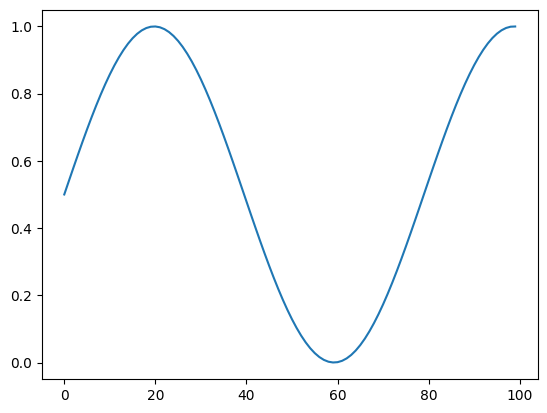

In [6]:
plt.plot(x,y)

In [7]:
def gen_seq(T, t_del, time_variance, N_parallel_sims):
    '''
    Function to generate a seqence of discrete values between 0 and T (max time)
    with time steps of size t_del. 

    These sequences are drawn from a non-homogeneous Bernoulli function which has 
    a probably of success given by time_variance.

    N_parallel_sims dictates the number of simulations run.
    '''
    seq = []
    true_ent = []
    for t in np.arange(0,T,t_del):
        p = time_variance(t)
        seq.append(simulate_bernoulli(N_parallel_sims,p))
        true_ent.append(-p*np.log2(p)-(1-p)*np.log2(1-p))

    seq = np.array(seq)
    return list(np.arange(0,T,t_del)), list(seq.reshape((np.size(seq),1))), seq, true_ent


In [8]:
N_parallel_sims = 1
t_del = 0.1
T = 100
times, values, seq, true_ent = gen_seq(T,t_del,time_variance,N_parallel_sims)

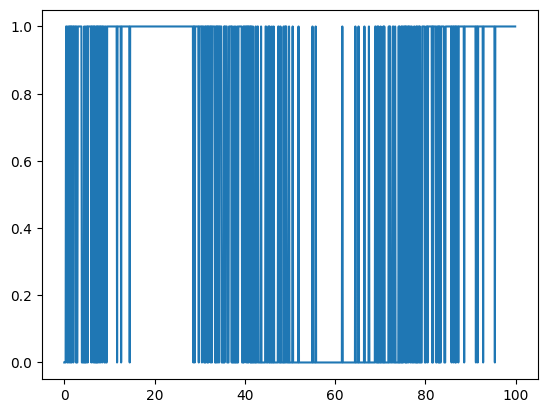

In [9]:
plt.plot(times,np.mean(seq, axis=1))

In [ ]:
# entropy of each subsequence
ent_rates = []
m = 10 # size of sliding window

for s in seq.T:
    ent_rates.append(list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)])) # gets all substrings of length m

In [ ]:
from collections.abc import Iterable

# need a function to flatten irregular list of lists
def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

In [ ]:
x = list(np.arange(len(ent_rates[0])))* N_parallel_sims
y = list(flatten(ent_rates))

In [ ]:
true_x = list(np.arange(seq.shape[0]) / seq.shape[0] * len(ent_rates[0]))
true_y = true_ent

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


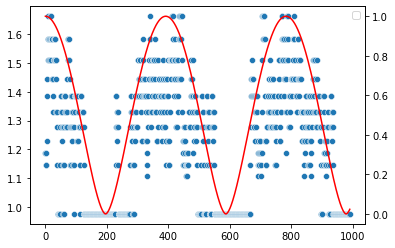

In [ ]:
sns.scatterplot(x=x, y=y)#, label = 'Subsequence Estimate')
ax1 = plt.twinx()
sns.lineplot(x=true_x, y=true_y, ax = ax1, color = 'red')#, label='True Entropy')
plt.legend()

In [ ]:
# entropy of each subsequence
ent_rates = []
m = 100 # size of sliding window
mid_point = []
for s in seq.T:
    ent_rates.append(list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)])) # gets all substrings of length m
    mid_point.append([i+m/2 for i in range(len(s)-m+1)])

In [ ]:
x = list(np.arange(len(ent_rates[0])))* N_parallel_sims
y = list(flatten(ent_rates))

In [ ]:
true_x = np.arange( T/t_del)[:-m] # list(np.arange(seq.shape[0]) / seq.shape[0] * len(ent_rates[0]))
true_y = true_ent[ m//2:-m+ m//2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


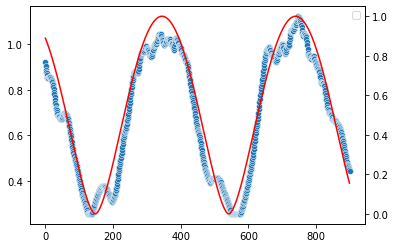

In [ ]:
sns.scatterplot(x=x, y=y)#, label = 'Subsequence Estimate')
ax1 = plt.twinx()
sns.lineplot(x=true_x, y=true_y, ax = ax1, color = 'red')#, label='True Entropy')
plt.legend()

In [ ]:
# entropy of each subsequence
ent_rates = []
m = 250 # size of sliding window
mid_point = []

for s in seq.T:
    ent_rates.append(list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)])) # gets all substrings of length m
    mid_point.append([i+m/2 for i in range(len(s)-m+1)])

In [ ]:
x = list(np.arange(len(ent_rates[0])))* N_parallel_sims
y = list(flatten(ent_rates))

In [ ]:
true_x = np.arange( T/t_del)[:-m] # list(np.arange(seq.shape[0]) / seq.shape[0] * len(ent_rates[0]))
true_y = true_ent[ m//2:-m+ m//2]

<AxesSubplot:>

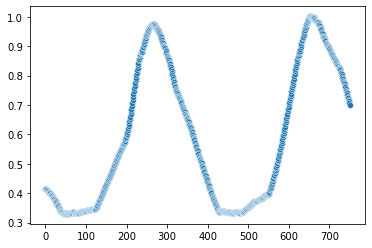

In [ ]:
sns.scatterplot(x=x, y=y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


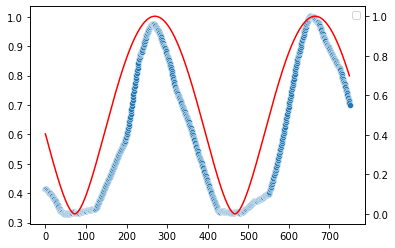

In [ ]:
sns.scatterplot(x=x, y=y)#, label = 'Subsequence Estimate')
ax1 = plt.twinx()
sns.lineplot(x=true_x, y=true_y, ax = ax1, color = 'red')#, label='True Entropy')
plt.legend()

In [ ]:
# entropy of each subsequence
ent_rates = []
m = 500 # size of sliding window
mid_point = []

for s in seq.T:
    ent_rates.append(list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)])) # gets all substrings of length m
    mid_point.append([i+m/2 for i in range(len(s)-m+1)])

In [ ]:
x = list(np.arange(len(ent_rates[0])))* N_parallel_sims
y = list(flatten(ent_rates))

In [ ]:
true_x = np.arange( T/t_del)[:m] # list(np.arange(seq.shape[0]) / seq.shape[0] * len(ent_rates[0]))
true_y = true_ent[ m//2:-m+ m//2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


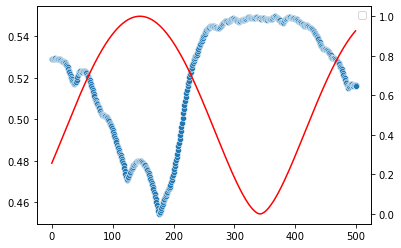

In [ ]:
sns.scatterplot(x=x, y=y)#, label = 'Subsequence Estimate')
ax1 = plt.twinx()
sns.lineplot(x=true_x, y=true_y, ax = ax1, color = 'red')#, label='True Entropy')
plt.legend()

# assess fit function

In [3]:
def assess_fit(y,y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    return ss_res, ss_tot

In [14]:
def gen_seq(T, t_del, time_variance, N_parallel_sims):
    '''
    Function to generate a seqence of discrete values between 0 and T (max time)
    with time steps of size t_del. 

    These sequences are drawn from a non-homogeneous Bernoulli function which has 
    a probably of success given by time_variance.

    N_parallel_sims dictates the number of simulations run.
    '''
    seq = []
    # true_ent = []
    for t in np.arange(0,T,t_del):
        p = time_variance(t)
        seq.append(simulate_bernoulli(N_parallel_sims,p))
        # true_ent.append(-p*np.log2(p)-(1-p)*np.log2(1-p))

    seq = np.array(seq)
    return np.arange(0,T,t_del), seq


In [15]:
# entropy of each subsequence
def gen_sliding_window(m, seq,N_parallel_sims):
    '''
    Returns average estimate for each time
    '''
    ent_rates = np.zeros(seq.shape)

    for iter in range(N_parallel_sims): # for each parallel sequence
        s = seq[:,iter]
        ent_rates[m//2:-m//2+1,iter] = list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)]) # gets all substrings of length m # go from m//2-1 since we are only going from i to i+m-1

    return np.mean(ent_rates, axis=1), np.mean(np.var(ent_rates, axis=1))

In [16]:
T = 1000
t_del = 0.1
N_parallel_sims = 10


In [17]:
res= []
for m in tqdm(np.arange(10,900,10)):
    y = true_entropy(time_variance,times)
    times, seq = gen_seq(T,t_del,time_variance, N_parallel_sims)
    y_fit, v = gen_sliding_window(m,seq,N_parallel_sims)
    ss_res, ss_tot = assess_fit(y[y_fit!=0], y_fit[y_fit!=0])
    # print(f'For a sliding window side of {m}, we have ss_res, {ss_res} and ss_tot, {ss_tot} with an average estimate variance of {v} and {sum(y_fit!=0)} points.')
    res.append([m,ss_res,ss_tot,v,sum(y_fit!=0), len(seq)])

  0%|          | 0/89 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(res, columns=['m','SS_res','SS_tot','variance','N','seq length'])

<AxesSubplot:xlabel='m', ylabel='SS_res'>

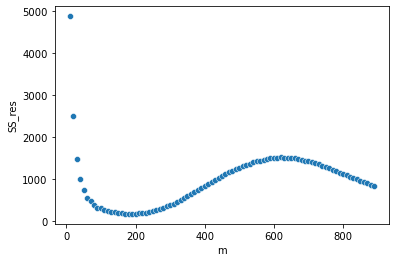

In [380]:
sns.scatterplot(data = df, x='m', y='SS_res')

<AxesSubplot:xlabel='m', ylabel='SS_tot'>

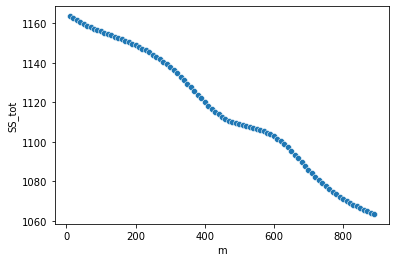

In [381]:
sns.scatterplot(data = df, x='m', y='SS_tot')

<AxesSubplot:xlabel='m', ylabel='variance'>

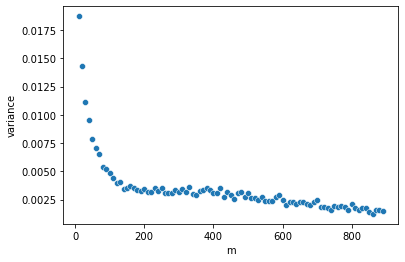

In [384]:
sns.scatterplot(data = df, x='m', y='variance')

In [411]:
# plot of best MA

m=400
x, seq = gen_seq(T,t_del,time_variance, N_parallel_sims)
y_fit, _ = gen_sliding_window(m, seq,N_parallel_sims)
y = true_entropy(time_variance,times)


<AxesSubplot:>

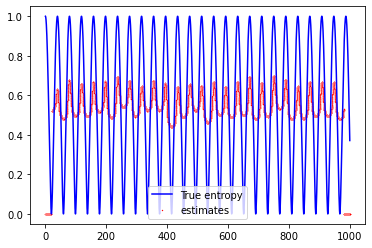

In [412]:

sns.lineplot(x=x,y=y,color='blue',label='True entropy')
sns.scatterplot(x=x,y=y_fit, color='red', label = 'estimates', s=2)

# grid search

# try spline

## then choose the best m

In [427]:

m_best=400
x, seq = gen_seq(T,t_del,time_variance, N_parallel_sims)
y_fit, _ = gen_sliding_window(m, seq,N_parallel_sims)

In [387]:
import numpy as np
from scipy.interpolate import splrep, BSpline

In [388]:
tck = splrep(x, y_fit, s=2)
tck_s = splrep(x, y_fit, s=len(x))

In [417]:
s_grid = np.arange(0,10) # smoothness
k_grid = np.arange(1,6) # degree of spline fit
true_e = true_entropy(time_variance,times)
res_d2 = []
for s_ in s_grid:
    for k_ in k_grid:
        tck = splrep(x, y_fit, s=s_,k=k_)
        y_sp = BSpline(*tck)(x)
        ss_res, ss_tot = assess_fit(true_e,y_sp)

        # print(f'For a number of knots {s_}, we have ss_res, {ss_res} and ss_tot, {ss_tot} with an average estimate variance of {v} and {sum(y_fit!=0)} points.')
        res_d2.append(['spline',s_,k_,ss_res,ss_tot])

In [418]:
df = pd.DataFrame(res_d2, columns=['type','s','k','SS_res','SS_tot'])

<AxesSubplot:xlabel='s', ylabel='SS_res'>

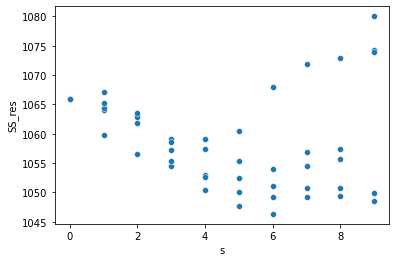

In [419]:
sns.scatterplot(data = df, x='s', y='SS_res')

<AxesSubplot:xlabel='s', ylabel='SS_tot'>

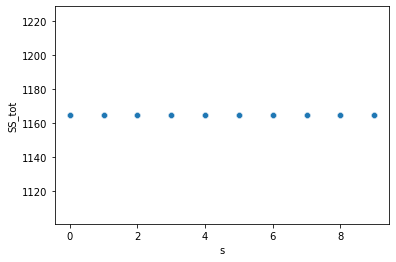

In [420]:
sns.scatterplot(data = df, x='s', y='SS_tot')

<AxesSubplot:xlabel='k', ylabel='SS_res'>

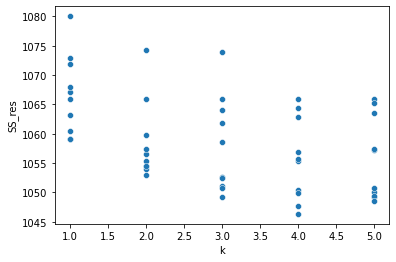

In [421]:
sns.scatterplot(data = df, x='k', y='SS_res')

<AxesSubplot:xlabel='k', ylabel='SS_tot'>

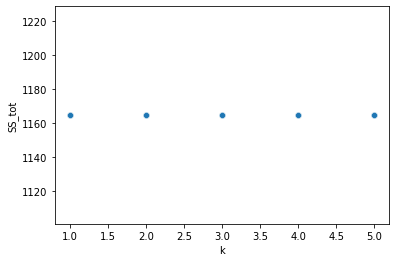

In [422]:
sns.scatterplot(data = df, x='k', y='SS_tot')

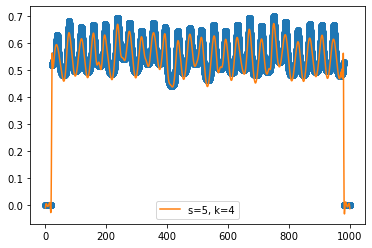

In [425]:
s_= 5
k_ = 4
tck = splrep(x, y_fit, s=s_,k=k_)
plt.plot(x, y_fit, 'o')
plt.plot(x, BSpline(*tck)(x), '-', label=f's={s_}, k={k_}')
plt.legend()
plt.show()

# try gaussian process

## Example from docs

In [426]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [430]:
# entropy of each subsequence
def gen_sliding_window(m, seq,N_parallel_sims):
    '''
    Returns average estimate for each time
    '''
    ent_rates = np.zeros(seq.shape)

    for iter in range(N_parallel_sims): # for each parallel sequence
        s = seq[:,iter]
        ent_rates[m//2:-m//2+1,iter] = list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)]) # gets all substrings of length m # go from m//2-1 since we are only going from i to i+m-1

    return np.mean(ent_rates, axis=1), ent_rates

In [443]:
m_best=400
x, seq = gen_seq(T,t_del,time_variance, N_parallel_sims)
y_means, y_fit = gen_sliding_window(m, seq,N_parallel_sims)

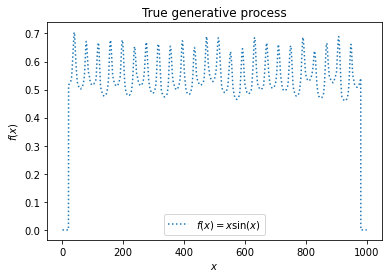

In [437]:
import numpy as np

import matplotlib.pyplot as plt

plt.plot(x, y_means, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [445]:
X = x.reshape(-1, 1)

In [495]:
#### example from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y_means.size), size=10, replace=False)
X_train, y_train = X[training_indices], y_means[training_indices]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=5000.0, length_scale_bounds=(1e-2, 1e4))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_


0.417**2 * RBF(length_scale=14.5)

In [496]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

ss_res, ss_tot = assess_fit(true_e,mean_prediction)

print(f'For a RBF, len_sc = 500, bounds 1e-2-1e3 we have ss_res, {ss_res} and ss_tot, {ss_tot} points.')
res_d2.append(['RBF, len_sc = 500, bounds 1e-2-1e3',m,ss_res,ss_tot])

For a RBF, len_sc = 500, bounds 1e-2-1e3 we have ss_res, 3653.6162318169854 and ss_tot, 1164.6732038883206 points.


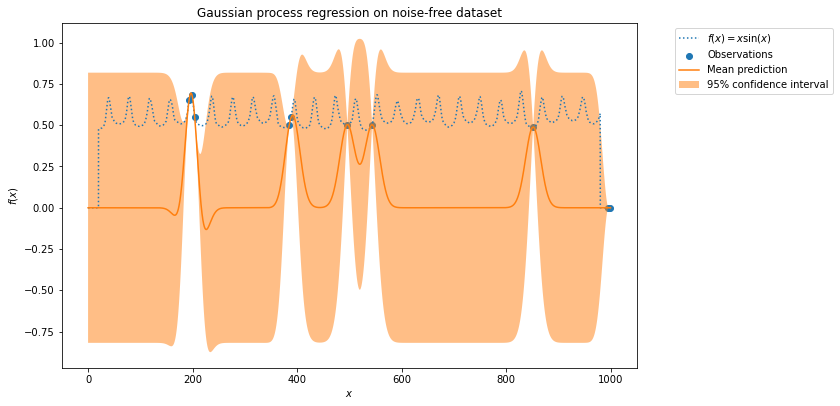

In [497]:
plt.figure(figsize=[10.3, 6.34])
plt.plot(X, y_means, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend(bbox_to_anchor=(1.35, 1))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

#### Various Kernels

In [191]:
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel = 1.0 * ExpSineSquared(
    length_scale=500.0,
    periodicity=1.0,
    length_scale_bounds=(0.1, 500.0),
    periodicity_bounds=(1.0, 500.0),
)

/opt/homebrew/Caskroom/miniforge/base/envs/hack/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/Caskroom/miniforge/base/envs/hack/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 500.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


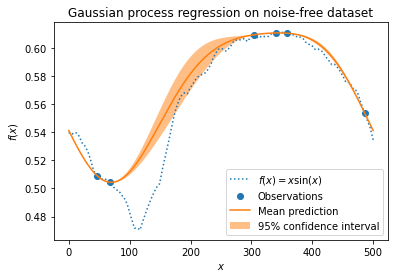

In [192]:
#### example from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = x[training_indices], y[training_indices]

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    (mean_prediction - 1.96 * std_prediction.reshape(-1,1)).ravel(),
    (mean_prediction + 1.96 * std_prediction.reshape(-1,1)).ravel(),
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [185]:
from sklearn.gaussian_process.kernels import Matern

kernel = 1.0 * Matern(length_scale=500.0, length_scale_bounds=(1e-1, 500.0), nu=2.5)

# smaller nu, less smooth

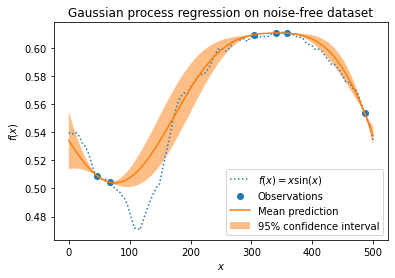

In [184]:
#### example from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = x[training_indices], y[training_indices]

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    (mean_prediction - 1.96 * std_prediction.reshape(-1,1)).ravel(),
    (mean_prediction + 1.96 * std_prediction.reshape(-1,1)).ravel(),
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [187]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = 1.0 * RationalQuadratic(length_scale=500.0, alpha=0.1, alpha_bounds=(1e-5, 1e15))

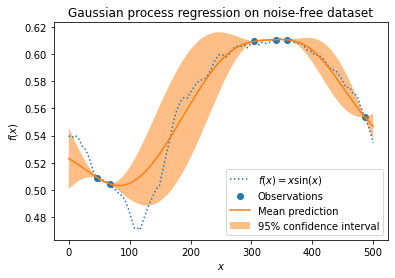

In [188]:
#### example from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = x[training_indices], y[training_indices]

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    (mean_prediction - 1.96 * std_prediction.reshape(-1,1)).ravel(),
    (mean_prediction + 1.96 * std_prediction.reshape(-1,1)).ravel(),
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

# Comparison and hyperparameter selection for best fit

### MA + smoothing spline is a win
### maybe gaussian process is useful if the kernels are interpretable, but for a function, smoothing spline doesn't require parameters to be chosen which is really good.

# Kernel estimation - overlapping ent estimates

In [498]:
import numpy as np

In [499]:
source = [[int(np.floor(x+3*np.random.rand()+j/5)) for j in range(np.random.randint(5,10))] for _ in range(20) for x in np.arange(5)]
target = [x if np.random.rand()>0.5 else [int(np.floor(3*np.random.rand()+j/5)) for j in range(np.random.randint(5,10))] for x in source[20:]+source[:20]]
time = np.arange(100)

In [500]:
source = [(time[i],source[i]) for i in range(len(time))]
target = [(time[i],target[i]) for i in range(len(time))]

In [501]:
from ProcessEntropy.CrossEntropy import get_all_lambdas

In [502]:
relative_pos = np.array([i for i in range(len(source))], dtype = np.uint32)

In [503]:
from collections.abc import Iterable

# need a function to flatten irregular list of lists
def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

In [504]:
target = list(flatten(target))
source = list(flatten(source))

In [505]:
get_all_lambdas(target, source, relative_pos)

array([2, 1, 2, 1, 2, 1, 4, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 3, 3, 4, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 1, 1, 1, 2, 2, 2, 5,
       4, 7, 6, 5, 4, 3, 2, 3, 3, 4, 3, 2, 3, 2, 2, 5, 4, 4, 3, 2, 1, 2,
       3, 2, 5, 4, 4, 3, 2, 1, 5, 4, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 4, 3,
       2, 1, 4, 3, 3, 3, 6, 5, 4, 3, 2])

if j is the index and value in relative_pos, this gives the maximum length of the source for i> j

basically want to take lambda matched to min(i,j) - this gives the lambda for a given history length

#### want to change it to \lambda / Log n

In [509]:
length_lambda_pairs = np.array([x for y in v for x in y])

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns

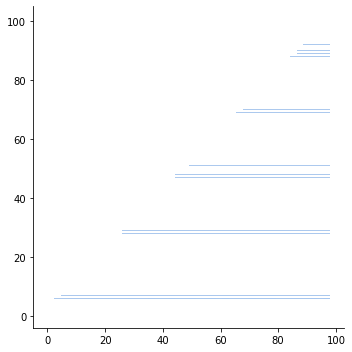

In [511]:
sns.displot(x = length_lambda_pairs[:,0], y= length_lambda_pairs[:,1])

# Detecting a jump

In [30]:
# set up sequence generating functions
def simulate_bernoulli(N_parallel_sims,p):
    return rng.binomial(1,p,size =N_parallel_sims)

def time_variance(t):
    '''
    Function which captures trends over time. This is user defined.
    '''
    if type(t) == type(np.array([])):
        return np.array([get_val(ti) for ti in t])
    else:
        return get_val(t)

def get_val(t):
    if t<50:
        return 0.2
    elif 50<=t<100:
        return 0.6
    else:
        return 0.8

def true_entropy(time_variance, times):
    return -time_variance(times)*np.log2(time_variance(times))-(1-time_variance(times))*np.log2(1-time_variance(times))


In [32]:
def assess_fit(y,y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    return ss_res, ss_tot 

def gen_seq(T, t_del, time_variance, N_parallel_sims):
    '''
    Function to generate a seqence of discrete values between 0 and T (max time)
    with time steps of size t_del. 

    These sequences are drawn from a non-homogeneous Bernoulli function which has 
    a probably of success given by time_variance.

    N_parallel_sims dictates the number of simulations run.
    '''
    seq = []
    # true_ent = []
    for t in np.arange(0,T,t_del):
        p = time_variance(t)
        seq.append(simulate_bernoulli(N_parallel_sims,p))
        # true_ent.append(-p*np.log2(p)-(1-p)*np.log2(1-p))

    seq = np.array(seq)
    return np.arange(0,T,t_del), seq

 # entropy of each subsequence
def gen_sliding_window(m, seq,N_parallel_sims):
    '''
    Returns average estimate for each time
    '''
    ent_rates = np.zeros(seq.shape)

    for iter in range(N_parallel_sims): # for each parallel sequence
        s = seq[:,iter]
        ent_rates[m//2:-m//2+1,iter] = list([self_entropy_rate(s[i:i+m]) for i in range(len(s)-m+1)]) # gets all substrings of length m # go from m//2-1 since we are only going from i to i+m-1

    return np.mean(ent_rates, axis=1), np.mean(np.var(ent_rates, axis=1))

In [ ]:
def get_val(t):
    if t<50:
        return 0.2
    elif 50<=t<100:
        return 0.6
    else:
        return 0.8
    
T
t_del
N_parallel_sims

In [35]:
def spline_grid_search(T,t_del, N_parallel_sims,get_val):

    res= []
    for m in tqdm(np.arange(10,T//2,2)):

        times, seq = gen_seq(T,t_del,time_variance,get_val, N_parallel_sims)
        y = true_entropy(time_variance,get_val,times)

        y_fit, v = gen_sliding_window(m,seq,N_parallel_sims)

        ss_res, ss_tot = assess_fit(y[y_fit!=0], y_fit[y_fit!=0])
        res.append([m,ss_res,ss_tot,v,sum(y_fit!=0), len(seq)])

    return pd.DataFrame(res, columns=['m','SS_res','SS_tot','variance','N','seq length']) 

  0%|          | 0/33 [00:00<?, ?it/s]

<Axes: xlabel='m', ylabel='SS_res'>

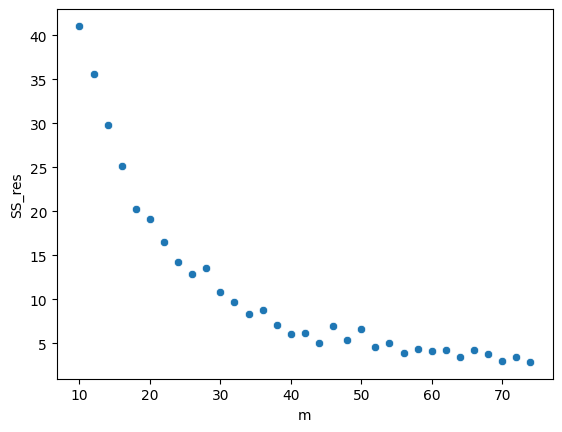

In [37]:
df = spline_grid_search(T,t_del, N_parallel_sims,get_val)

sns.scatterplot(data = df, x='m', y='SS_res') 

m_best = # CHOOSE BEST m

<Axes: xlabel='m', ylabel='SS_tot'>

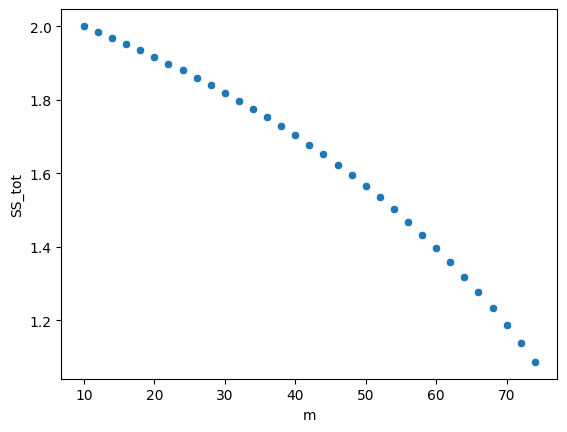

In [38]:
sns.scatterplot(data = df, x='m', y='SS_tot') 

<Axes: xlabel='m', ylabel='variance'>

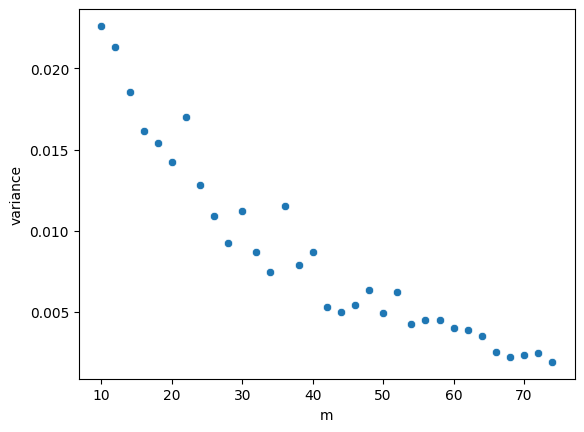

In [39]:

sns.scatterplot(data = df, x='m', y='variance')

In [40]:
def spline_grid(m_best,T,t_del,get_val)
    x, seq = gen_seq(T,t_del,time_variance,get_val, N_parallel_sims)
    y_fit, _ = gen_sliding_window(m, seq, N_parallel_sims)

    s_grid = np.arange(0,10) # smoothness
    k_grid = np.arange(1,6) # degree of spline fit
    true_e = true_entropy(time_variance,get_val,times)
    res_d2 = []
    for s_ in s_grid:
        for k_ in k_grid:
            tck = splrep(x, y_fit, s=s_,k=k_)
            y_sp = BSpline(*tck)(x)
            ss_res, ss_tot = assess_fit(true_e,y_sp)

            # print(f'For a number of knots {s_}, we have ss_res, {ss_res} and ss_tot, {ss_tot} with an average estimate variance of {v} and {sum(y_fit!=0)} points.')
            res_d2.append(['spline',s_,k_,ss_res,ss_tot])

    return pd.DataFrame(res_d2, columns=['type','s','k','SS_res','SS_tot'])

In [43]:
import numpy as np
from scipy.interpolate import splrep, BSpline

In [44]:
tck = splrep(x, y_fit, s=2)
tck_s = splrep(x, y_fit, s=len(x))


In [45]:
s_grid = np.arange(0,10) # smoothness
k_grid = np.arange(1,6) # degree of spline fit
true_e = true_entropy(time_variance,times)
res_d2 = []
for s_ in s_grid:
    for k_ in k_grid:
        tck = splrep(x, y_fit, s=s_,k=k_)
        y_sp = BSpline(*tck)(x)
        ss_res, ss_tot = assess_fit(true_e,y_sp)

        # print(f'For a number of knots {s_}, we have ss_res, {ss_res} and ss_tot, {ss_tot} with an average estimate variance of {v} and {sum(y_fit!=0)} points.')
        res_d2.append(['spline',s_,k_,ss_res,ss_tot])

In [46]:
df = pd.DataFrame(res_d2, columns=['type','s','k','SS_res','SS_tot'])

<Axes: xlabel='s', ylabel='SS_res'>

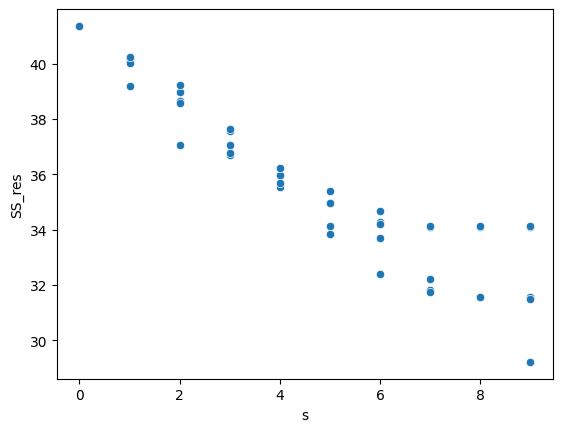

In [47]:
sns.scatterplot(data = df, x='s', y='SS_res')

<Axes: xlabel='k', ylabel='SS_res'>

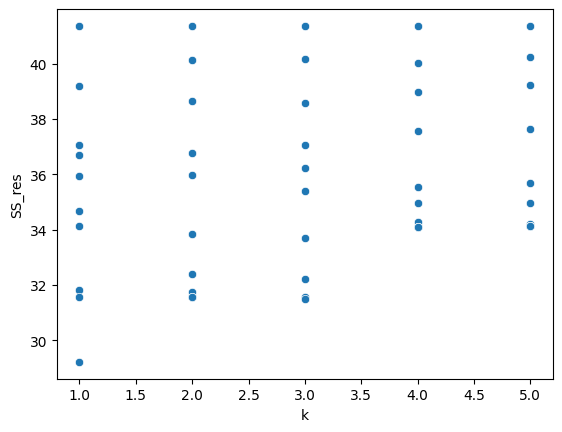

In [49]:
sns.scatterplot(data = df, x='k', y='SS_res')

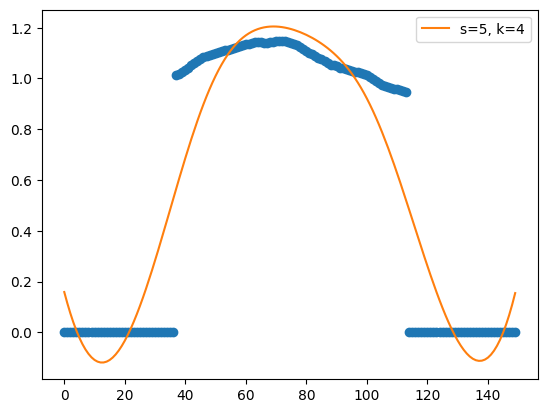

In [51]:
s_= 5
k_ = 4
tck = splrep(x, y_fit, s=s_,k=k_)
plt.plot(x, y_fit, 'o')
plt.plot(x, BSpline(*tck)(x), '-', label=f's={s_}, k={k_}')
plt.legend()
plt.show()